# HW2- SVM & Random Forests 

<h3>Load data</h3>

In [1]:
# import the required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# read the csv data from local drive 
data = pd.read_csv("intrusion.csv")
print(data.shape)
data.head(5)

(10100, 4)


,Attribute1,Attribute2,Attribute3,Intrusion
0,2.157322,1.922947,3.223735,0
1,1.711650,5.534262,1.519069,0
2,-1.062710,0.913824,0.715046,0
3,-0.100344,6.153463,2.250014,0
4,0.145073,6.553025,2.214019,0


<h3>Scatter Plot</h3>

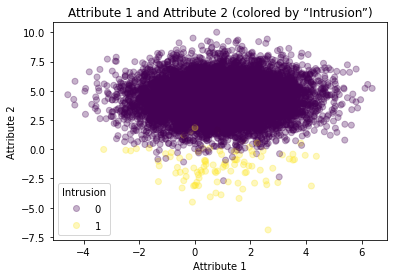

In [4]:
# Draw scatter plot for Attribute 1 and Attribute 2
a1 = data["Attribute1"]
a2 = data["Attribute2"]
a3 = data["Attribute3"]
colors = data["Intrusion"]

fig = plt.figure()
ax = plt.axes()
scatter = ax.scatter(a1, a2, c = colors, cmap='viridis', alpha=0.3)
ax.set(xlabel = 'Attribute 1', ylabel = 'Attribute 2')
ax.set_title("Attribute 1 and Attribute 2 (colored by “Intrusion”)")
ax.legend(*scatter.legend_elements(), title = "Intrusion")

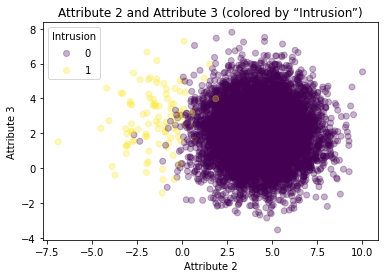

In [5]:
# Draw scatter plot for Attribute 2 and Attribute 3 
fig = plt.figure()
ax = plt.axes()
scatter = ax.scatter(a2, a3, c = colors, cmap='viridis', alpha=0.3)
ax.set(xlabel = 'Attribute 2', ylabel = 'Attribute 3')
ax.set_title("Attribute 2 and Attribute 3 (colored by “Intrusion”)")
ax.legend(*scatter.legend_elements(), title = "Intrusion")

<h3>Split the data into train and test sets using sklearn</h3>

In [5]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0:3].to_numpy() # Select Column of Attribute 1, 2 and 3 
y = data[["Intrusion"]].to_numpy() # Select Intrusion column 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6767, 3)
(3333, 3)
(6767, 1)
(3333, 1)


<h3>Training a SVC</h3>

In [113]:
# Training a SVC using the Poly kernels 
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)
ypred = model.predict(x_test) 

C:\Users\MEI-KUEI LU\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [114]:
# Classification Report 
from sklearn import metrics
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3301
           1       0.92      0.69      0.79        32

    accuracy                           1.00      3333
   macro avg       0.96      0.84      0.89      3333
weighted avg       1.00      1.00      1.00      3333



In [115]:
# Confusion matrix of SVC using the Poly kernels 
from sklearn.metrics import confusion_matrix

confused = confusion_matrix(y_test,ypred)
print(confused)

#### Confusion Matrix Interpretation 
# true positives: 3299 (Intrusion = 0 is identified as Intrusion = 0)
# true negatives: 22 (Intrusion = 1 is identified as Intrusion = 1)
# false positives: 2 (Intrusion = 0 is identified as Intrusion = 1)
# false negatives: 10 (Intrusion = 1 is identified as Intrusion = 0)

[[3299    2]
 [  10   22]]


In [116]:
# Training a SVC using the linear kernels 
model = SVC(kernel='linear', C=1E10)
model.fit(x_train, y_train) 
ypred = model.predict(x_test) 

C:\Users\MEI-KUEI LU\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [117]:
# Classification Report 
from sklearn import metrics
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3301
           1       0.86      0.78      0.82        32

    accuracy                           1.00      3333
   macro avg       0.93      0.89      0.91      3333
weighted avg       1.00      1.00      1.00      3333



In [118]:
# Confusion matrix of SVC using the linear kernels 
from sklearn.metrics import confusion_matrix

confused = confusion_matrix(y_test,ypred)
print(confused)

#### Confusion Matrix Interpretation 
# true positives: 3297 (Intrusion = 0 is identified as Intrusion = 0)
# true negatives: 25 (Intrusion = 1 is identified as Intrusion = 1)
# false positives: 4 (Intrusion = 0 is identified as Intrusion = 1)
# false negatives: 7 (Intrusion = 1 is identified as Intrusion = 0)

[[3297    4]
 [   7   25]]


In [120]:
# Training a SVC using the RBF kernels 
model = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

C:\Users\MEI-KUEI LU\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [121]:
# Classification Report 
from sklearn import metrics
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3301
           1       0.92      0.72      0.81        32

    accuracy                           1.00      3333
   macro avg       0.96      0.86      0.90      3333
weighted avg       1.00      1.00      1.00      3333



In [122]:
# Confusion matrix of SVC using the RBF kernels 
from sklearn.metrics import confusion_matrix

confused = confusion_matrix(y_test,ypred)
print(confused)

#### Confusion Matrix Interpretation 
# true positives: 3299 (Intrusion = 0 is identified as Intrusion = 0)
# true negatives: 23 (Intrusion = 1 is identified as Intrusion = 1)
# false positives: 2 (Intrusion = 0 is identified as Intrusion = 1)
# false negatives: 9 (Intrusion = 1 is identified as Intrusion = 0)

[[3299    2]
 [   9   23]]


<h3>Train a Random Forest Classifier</h3>

In [92]:
from sklearn.ensemble import RandomForestClassifier                                               

model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

<ipython-input-92-4cac915a3de8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [93]:
# Classification Report 
from sklearn import metrics
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3301
           1       0.90      0.81      0.85        32

    accuracy                           1.00      3333
   macro avg       0.95      0.91      0.93      3333
weighted avg       1.00      1.00      1.00      3333



Confusion Matrix Interpretation 

true positives: 26 

true negatives: 3298 

false positives: 3 (Intrusion = 0 is identified as Intrusion = 1)

false negatives: 6 (Intrusion = 1 is identified as Intrusion = 0)

In [94]:
# Confusion matrix of RFC
from sklearn.metrics import confusion_matrix

confused = confusion_matrix(y_test,ypred)
print(confused)

[[3298    3]
 [   6   26]]


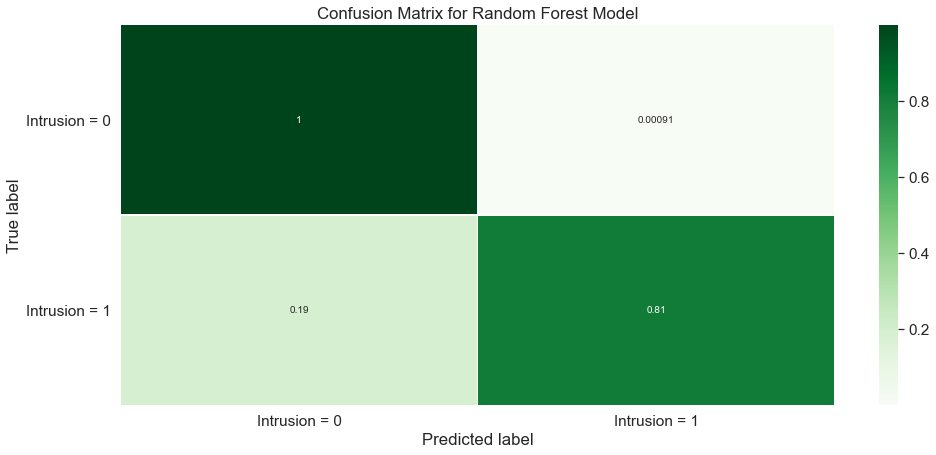

In [96]:
# Get and reshape confusion matrix data
import seaborn as sns

matrix = confusion_matrix(y_test, ypred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Intrusion = 0', 'Intrusion = 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks+0.5, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [97]:
# View accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.9972997299729973